Statsmodel下的线性回归

In [58]:
import numpy as np
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

X_raw = np.array([2013,2014,2015,2016,2017],dtype=np.int)
y_raw = np.array([12000,14000,15000,16000,17500],dtype=np.float32)
data = pd.DataFrame({'year': X_raw, 'price': y_raw})
data


,year,price
0,2013,12000.0
1,2014,14000.0
2,2015,15000.0
3,2016,16000.0
4,2017,17500.0


In [ ]:
# 绘图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure()
plt.scatter(X_raw,y_raw)
plt.title("房价趋势线性回归图")
plt.xlabel("年份")
plt.ylabel("房价")
plt.show()

In [ ]:
# plot use pandas data
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure()
plt.scatter(x = data['year'], y = data['price'])
plt.title("房价趋势线性回归图")
plt.xlabel("年份")
plt.ylabel("房价")
plt.show()


In [61]:
model = smf.ols(formula = 'price ~ year',data = data).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     169.0
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           0.000983
Time:                        23:22:49   Log-Likelihood:                -34.600
No. Observations:                   5   AIC:                             73.20
Df Residuals:                       3   BIC:                             72.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.605e+06   2.02e+05    -12.926      0.0

D:\Users\PC\anaconda3\envs\nlp\lib\site-packages\statsmodels\stats\stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


In [62]:
y_pred = model.predict(data.loc[:, 'year'])
y_pred


0    12300.0
1    13600.0
2    14900.0
3    16200.0
4    17500.0
dtype: float64

In [63]:
# add a new column to the dataframe
data['prediction'] = y_pred
data

,year,price,prediction
0,2013,12000.0,12300.0
1,2014,14000.0,13600.0
2,2015,15000.0,14900.0
3,2016,16000.0,16200.0
4,2017,17500.0,17500.0


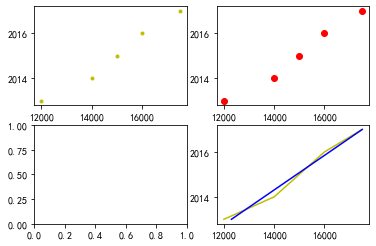

In [76]:
# redraw the graph
fig, axs = plt.subplots(2,2)
axs[0,0].plot('price','year','y.',data = data)
axs[0,1].plot('price', 'year', 'ro', data=data)

axs[1,1].plot('price', 'year', 'y-', data=data)
axs[1,1].plot('prediction', 'year', 'b-', data=data)